In [1]:
import time
import subprocess
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Measure Runtime for both options: 'scatter' and 'convert'

In [2]:
def measure_runtime(command):
    start_time = time.time()
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    end_time = time.time()
    runtime = end_time - start_time
    return runtime, result.stdout, result.stderr

In [3]:
input_files = [
    ("../example_files/C1_fpkm.csv", "../example_files/C2_fpkm.csv"),
    ("../example_files/C2_fpkm.csv", "../example_files/C3_fpkm.csv"),
    ("../example_files/C3_fpkm.csv", "../example_files/C1_fpkm.csv"),
    ("../example_files/T1_fpkm.csv", "../example_files/T2_fpkm.csv"),
    ("../example_files/T2_fpkm.csv", "../example_files/T3_fpkm.csv"),
    ("../example_files/T3_fpkm.csv", "../example_files/T1_fpkm.csv")
]

In [4]:
commands = {
    "scatter_plot": "quantgene scatter {file1} {file2} ./",
    "convert_fpkm_to_tpm": "quantgene convert {file1} ./"
}


In [5]:
def calculate_average_runtime(commands, file_pairs):
    runtimes = []
    for file1, file2 in file_pairs:
        command = commands.format(file1=file1, file2=file2)
        print(f"Measuring runtime for files: {file1}, {file2}")
        runtime, stdout, stderr = measure_runtime(command)
        if stderr:
            print(f"Errors for files {file1}, {file2}:\n{stderr}")
        else:
            runtimes.append(runtime)
    average_runtime = np.mean(runtimes)
    return average_runtime, runtimes

In [6]:
average_runtimes = {}
all_runtimes = {}

for name, command in commands.items():
    print(f"Calculating average runtime for {name}...")
    avg_runtime, runtimes = calculate_average_runtime(command, input_files)
    average_runtimes[name] = avg_runtime
    all_runtimes[name] = runtimes
    print(f"Average runtime for {name}: {avg_runtime:.2f} seconds")

Calculating average runtime for scatter_plot...
Measuring runtime for files: ../example_files/C1_fpkm.csv, ../example_files/C2_fpkm.csv
Errors for files ../example_files/C1_fpkm.csv, ../example_files/C2_fpkm.csv:
Traceback (most recent call last):
  File "/Users/zoekim/miniconda3/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3653, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 147, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 176, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'TPM_Rep1'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Users/zoekim/miniconda3/bin/quantgene", line 8, in <module>
 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Measuring runtime for files: ../example_files/C2_fpkm.csv, ../example_files/C3_fpkm.csv
Measuring runtime for files: ../example_files/C3_fpkm.csv, ../example_files/C1_fpkm.csv
Measuring runtime for files: ../example_files/T1_fpkm.csv, ../example_files/T2_fpkm.csv
Measuring runtime for files: ../example_files/T2_fpkm.csv, ../example_files/T3_fpkm.csv
Measuring runtime for files: ../example_files/T3_fpkm.csv, ../example_files/T1_fpkm.csv
Average runtime for convert_fpkm_to_tpm: 0.47 seconds


## Get the Average Runtime 

In [7]:
average_runtime_df = pd.DataFrame(list(average_runtimes.items()), columns=['Task', 'Average Runtime'])

## Visualize the Average Runtime in both options (s)

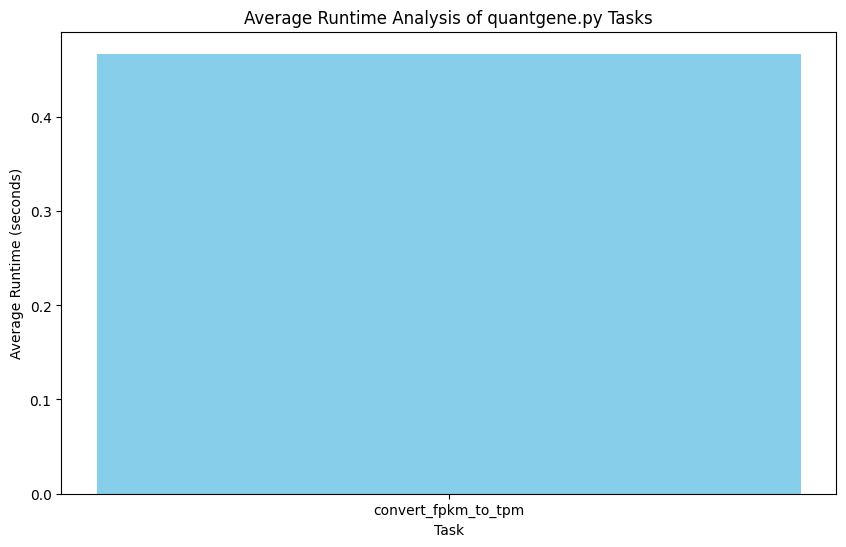

In [8]:
plt.figure(figsize=(10, 6))
plt.bar(average_runtime_df['Task'], average_runtime_df['Average Runtime'], color='skyblue')
plt.xlabel('Task')
plt.ylabel('Average Runtime (seconds)')
plt.title('Average Runtime Analysis of quantgene.py Tasks')
plt.show()

### Get Dataframe of Average Runtime 

In [9]:
average_runtime_df

,Task,Average Runtime
0,scatter_plot,NaN
1,convert_fpkm_to_tpm,0.467281
